In [4]:
import tarfile
import os

data_base_path = os.path.join('data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

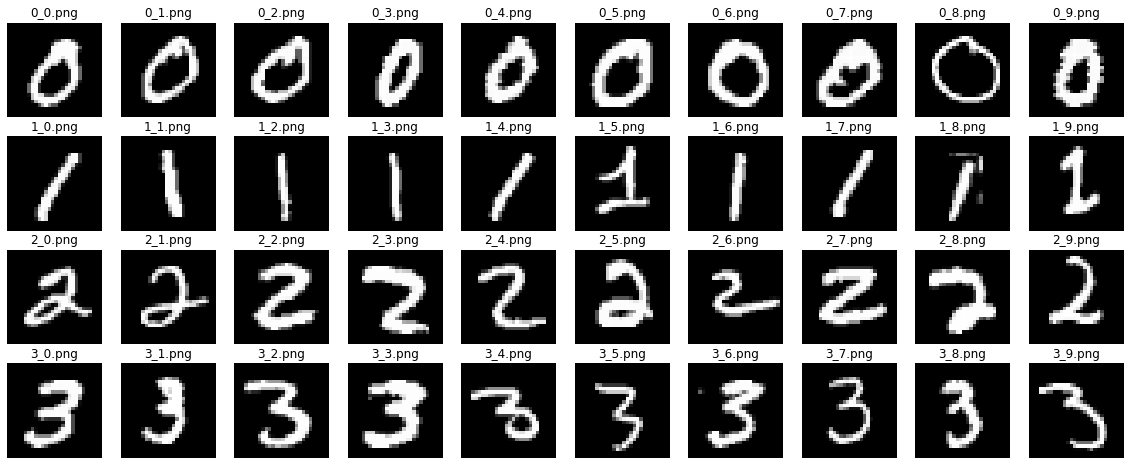

In [32]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
# Load digits data

# Zero images arrays
zeros_im, zeros_names = load(data_part1, digit='0')
# Ones images arrays
ones_im, ones_names = load(data_part1, digit='1')
# Twos images arrays
twos_im, twos_names = load(data_part2, digit='2')
# Threes images arrays
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[2], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

## contour extraction

TypeError: Image data of dtype object cannot be converted to float

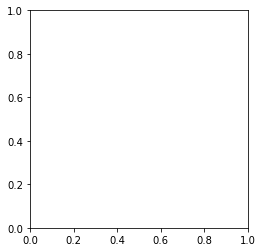

In [33]:
import cv2
from cv2 import findContours
output = cv2.findContours(zeros_im[0],mode=1,method= cv2.CHAIN_APPROX_NONE)
output[0]
#plt.imshow(output[0])
#plt.show()

In [55]:
contour_in = [list(x[0]) for x in output[0][0]]
contour_out = [list(x[0]) for x in output[0][1]]
contour_image = np.zeros_like(zeros_im[0])
for i,j in contour_in:
    contour_image[i][j]=1
for i,j in contour_out:
    contour_image[i][j]=1

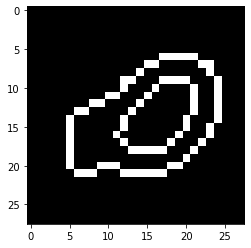

In [54]:
plt.imshow(contour_image,cmap='gray')

## Fourier tricks

In [92]:
import numpy as np
from numpy import fft
complex_contour_in = list(map(lambda x: x[0]+x[1]*1j,contour_in))
complex_contour_out = list(map(lambda x: x[0]+x[1]*1j,contour_in))
contour_in_fft = fft.fft(complex_contour_in)
contour_out_fft = fft.fft(contour_out)
contour_in_fft

array([ 3.42000000e+02+4.15000000e+02j,  9.94275044e+00-1.11747335e+02j,
        1.07772026e+00-2.19987497e+00j, -3.71132712e+00-9.19673659e-01j,
       -6.78634197e-01-2.52202539e+00j, -2.56909051e+00+6.90983006e-01j,
       -6.03531831e-01+6.58683528e-01j,  9.38525914e-01+1.17469651e+00j,
       -7.70709529e-01+1.69741464e+00j, -1.01202145e-01-7.01986651e-01j,
        3.02487365e-02+1.80901699e+00j,  4.08819066e-01+2.80009050e-01j,
       -9.97943799e-01+8.74857302e-01j,  5.90471525e-02+1.55700564e+00j,
       -3.46963085e-01+4.70382184e-01j,  1.20581924e+00+1.80901699e+00j,
       -3.35108390e-01+6.40839097e-01j,  3.68191670e-01+1.40496830e+00j,
        1.52260760e+00-6.13421661e-01j,  3.69634372e-01-6.11788280e-02j,
       -6.66977472e-01+6.90983006e-01j,  2.81167911e-02-5.19938681e-01j,
        7.94607357e-01-3.03879461e+00j,  1.44877066e+00-4.03547807e+00j,
        2.55866288e+01-2.39914907e+00j])

In [108]:
ct_in.shape

(25,)

ValueError: too many values to unpack (expected 2)

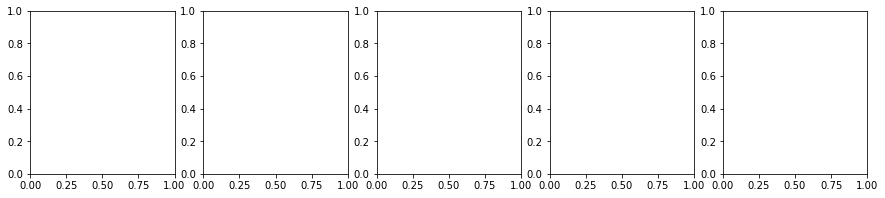

In [103]:
def fourier_function(contour_in_fft):
    fig, axs = plt.subplots(ncols=5,figsize=(15,3))
    for num_coef in range(1,6):
        ct_in_trim = np.copy(contour_in_fft)
        ct_in_trim[6 - num_coef:] = 0 + 0*1j
        ct_out_trim = np.copy(contour_in_fft)
        ct_out_trim[6 - num_coef:] = 0 + 0*1j
        #print(ct_in_trim)
        ct_in = fft.ifft(ct_in_trim)
        ct_out = fft.ifft(ct_out_trim)
        ct_image = np.zeros_like(zeros_im[0])
        for i,j in np.column_stack((ct_in.real,ct_in.imag)):
            ct_image[round(i),round(j)]=1
        for i,j in np.column_stack((ct_in.real,ct_in.imag)):
            ct_image[round(i),round(j)]=1
        axs[num_coef-1].imshow(ct_image)
    fig.show()
    return 0

fourier_function(contour_out_fft)
    
   
